# Лабораторная работа №1

In [35]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 500
df = pd.DataFrame({
    'код респондента': np.random.randint(1, int(0.33 * n), size=n),
    'дата опроса': np.random.choice(['2020-01-31', '2021-01-31', '2022-02-03', '2019-06-06'], size=n),
    'пол': np.random.choice(['муж', 'жен'], size=n, p=(0.35, 0.65)),
    'образование': np.random.choice(['высшее', 'незаконченное высшее', 'среднее', 'среднее специальное'],
                                   size=n, p=(0.1, 0.1, 0.4, 0.4)),
    'социальный статус': np.random.choice(['холост/незамужем', 'женат/замужем', 'вдовец/вдова', 'разведен/разведена'],
                                       size=n, p=(0.45, 0.05, 0.05, 0.45)),
    'возраст': np.rint(np.random.normal(45, 15, size=n)).astype(int),
    'рост': np.concatenate([
        np.rint(np.random.normal(160, 20, size=int(n * 0.9))),
        np.rint(np.random.normal(180, 20, size=n - int(n * 0.9)))
    ]).astype(int)
})

df['вес'] = df['рост'] - (100 + (df['рост'] - 100) / 20) + np.rint(np.random.normal(10, 2, size=n)).astype(int)

print(df.head())


   код респондента дата опроса  пол           образование   социальный статус  \
0              103  2019-06-06  жен   среднее специальное  разведен/разведена   
1               93  2020-01-31  жен               среднее        вдовец/вдова   
2               15  2022-02-03  жен  незаконченное высшее    холост/незамужем   
3              107  2020-01-31  жен  незаконченное высшее    холост/незамужем   
4               72  2022-02-03  жен               среднее    холост/незамужем   

   возраст  рост    вес  
0       28   182  90.90  
1       32   164  70.80  
2       47   179  89.05  
3       47   159  65.05  
4       21   143  50.85  


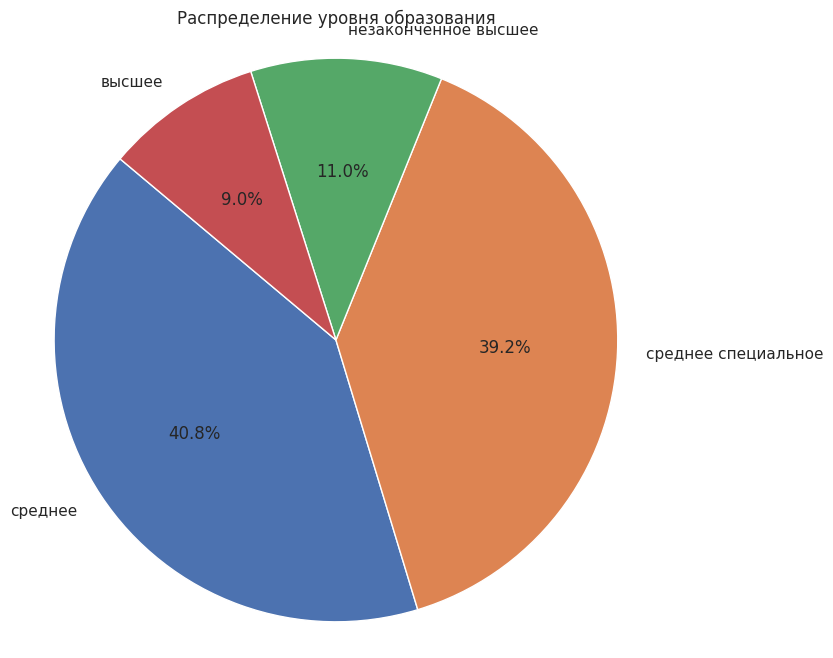

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# 2.1 Круговая диаграмма для «образование»
education_counts = df['образование'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение уровня образования')
plt.axis('equal')
plt.show()

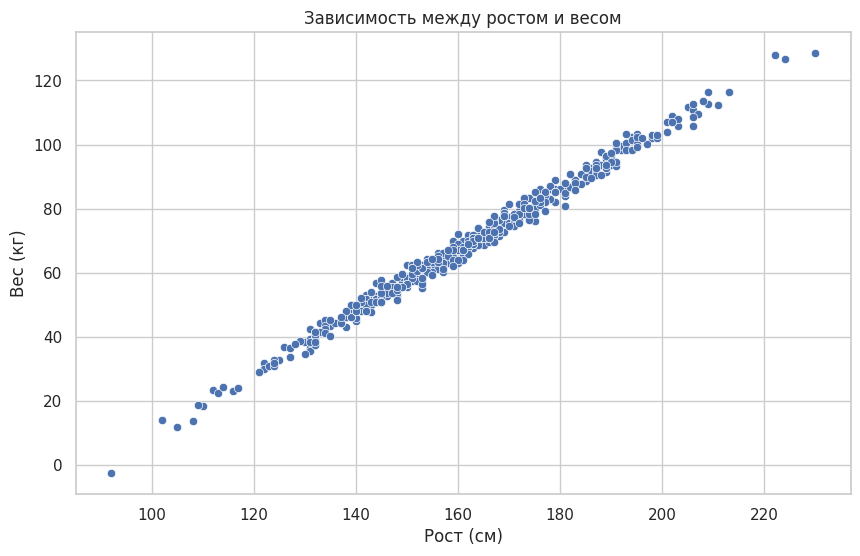

In [37]:
# 2.2 Диаграмма рассеяния между «рост» и «вес»
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='рост', y='вес')
plt.xlabel('Рост (см)')
plt.ylabel('Вес (кг)')
plt.title('Зависимость между ростом и весом')
plt.grid(True)
plt.show()

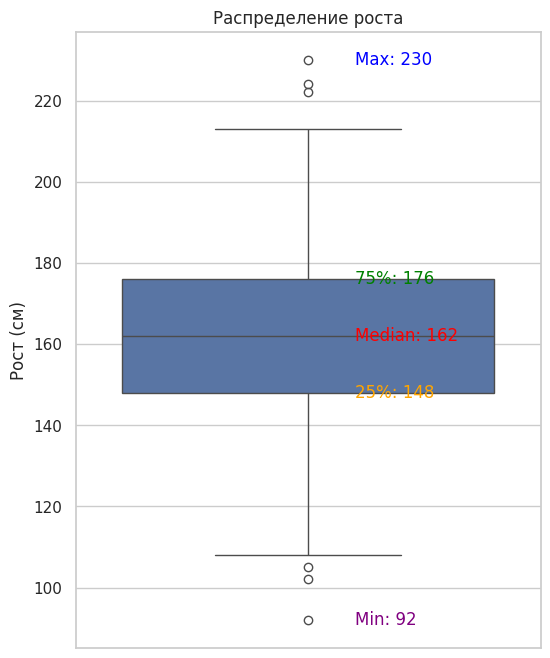

In [38]:
# 2.3 Ящик с усами для распределения «рост»
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['рост'])
plt.title('Распределение роста')
plt.ylabel('Рост (см)')

stats = df['рост'].describe()

x = 0

plt.text(x + 0.1, stats['max'], f"Max: {int(stats['max'])}", horizontalalignment='left', verticalalignment='center', color='blue')
plt.text(x + 0.1, stats['75%'], f"75%: {int(stats['75%'])}", horizontalalignment='left', verticalalignment='center', color='green')
plt.text(x + 0.1, stats['50%'], f"Median: {int(stats['50%'])}", horizontalalignment='left', verticalalignment='center', color='red')
plt.text(x + 0.1, stats['25%'], f"25%: {int(stats['25%'])}", horizontalalignment='left', verticalalignment='center', color='orange')
plt.text(x + 0.1, stats['min'], f"Min: {int(stats['min'])}", horizontalalignment='left', verticalalignment='center', color='purple')

plt.show()

<ipython-input-39-1776fe69e1ac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')


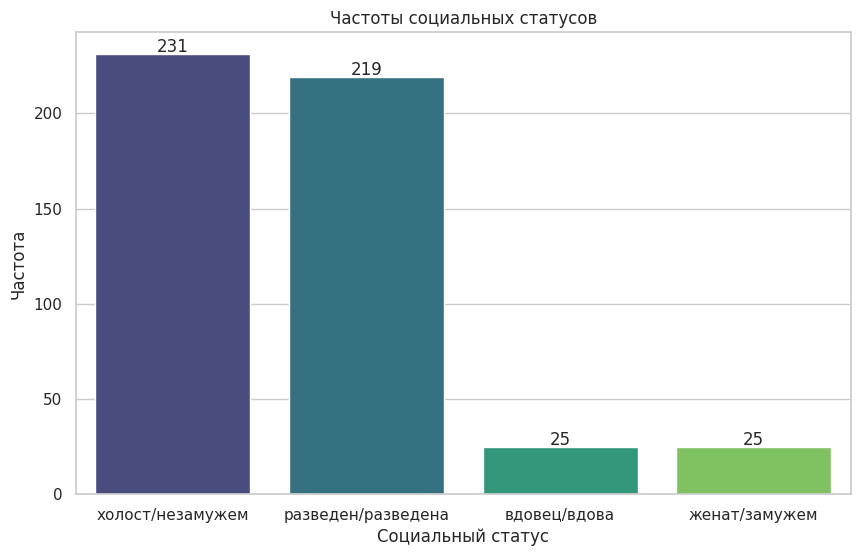

In [39]:
# 2.4 Гистограмма для переменной «социальный статус»
status_counts = df['социальный статус'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
plt.xlabel('Социальный статус')
plt.ylabel('Частота')
plt.title('Частоты социальных статусов')
for index, value in enumerate(status_counts.values):
    plt.text(index, value + 1, str(value), ha='center')
plt.show()

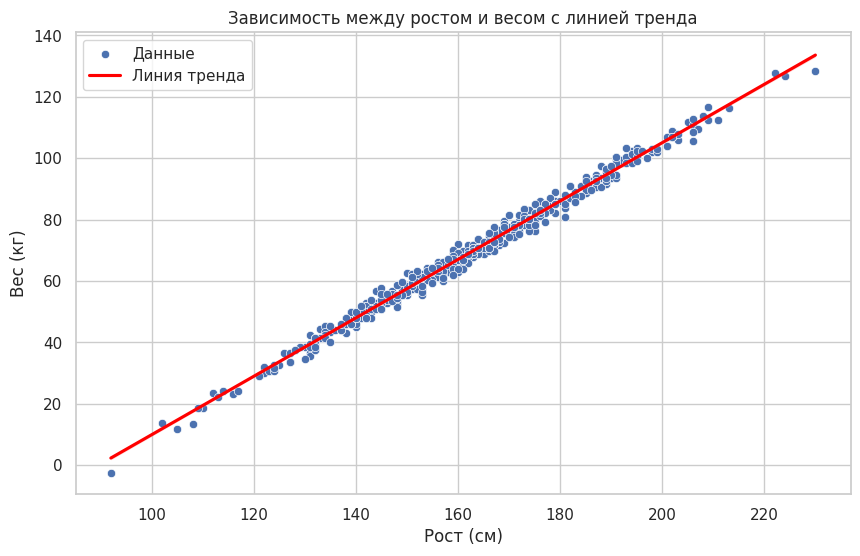

In [40]:
# 3. Добавление линии тренда на диаграмму рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='рост', y='вес', label='Данные')
sns.regplot(data=df, x='рост', y='вес', scatter=False, color='red', label='Линия тренда')
plt.xlabel('Рост (см)')
plt.ylabel('Вес (кг)')
plt.title('Зависимость между ростом и весом с линией тренда')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-41-d26dc19bd7f8>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 1], x=status_counts.index, y=status_counts.values, palette='viridis')


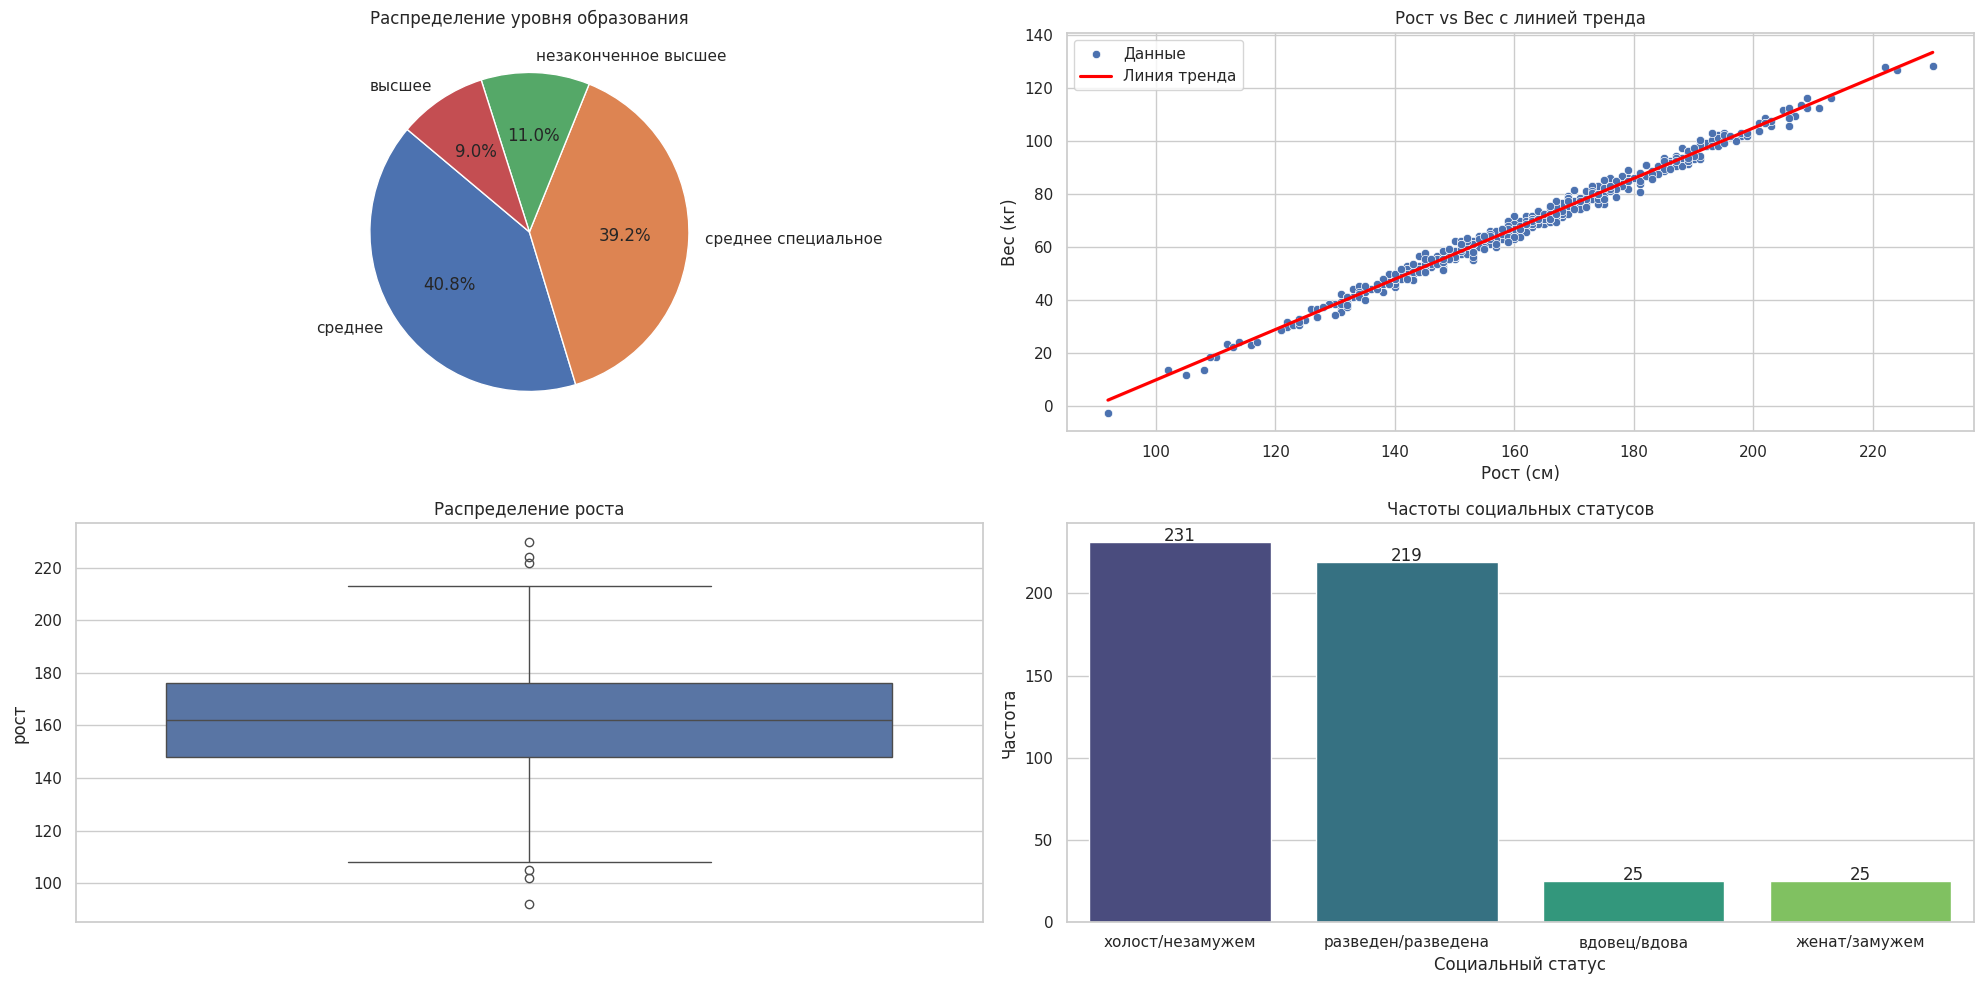

In [41]:
# 4. Единая диаграмма с subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# 2.1 Круговая диаграмма для «образование»
axes[0, 0].pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('Распределение уровня образования')

# 2.2 Диаграмма рассеяния «рост» vs «вес» с линией тренда
sns.scatterplot(ax=axes[0, 1], data=df, x='рост', y='вес', label='Данные')
sns.regplot(ax=axes[0, 1], data=df, x='рост', y='вес', scatter=False, color='red', label='Линия тренда')
axes[0, 1].set_xlabel('Рост (см)')
axes[0, 1].set_ylabel('Вес (кг)')
axes[0, 1].set_title('Рост vs Вес с линией тренда')
axes[0, 1].legend()

# 2.3 Ящик с усами для «рост»
sns.boxplot(ax=axes[1, 0], y=df['рост'])
axes[1, 0].set_title('Распределение роста')

# 2.4 Гистограмма для «социальный статус»
sns.barplot(ax=axes[1, 1], x=status_counts.index, y=status_counts.values, palette='viridis')
axes[1, 1].set_xlabel('Социальный статус')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].set_title('Частоты социальных статусов')
for index, value in enumerate(status_counts.values):
    axes[1, 1].text(index, value + 1, str(value), ha='center')

plt.tight_layout()
plt.show()

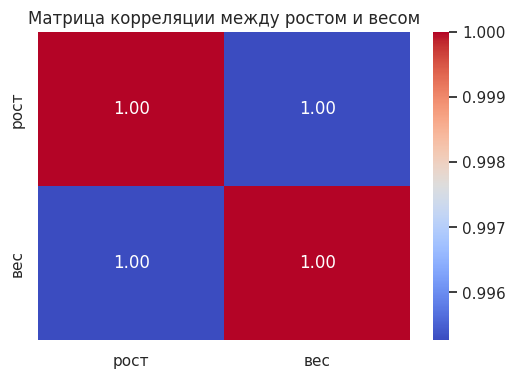

In [42]:
# 5. Тепловая карта матрицы корреляции между «рост» и «вес»
numeric_df = df[['рост', 'вес']]
corr_matrix = numeric_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции между ростом и весом')
plt.show()

<ipython-input-43-3f1abb026f84>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='пол', y='рост', data=df, palette='Set2')


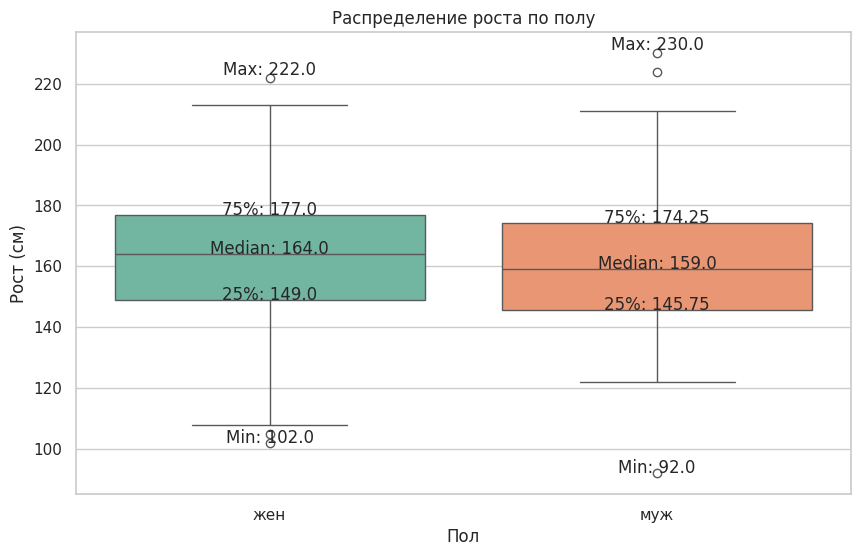

In [43]:
# 6. Ящик с усами для «рост» по полу
plt.figure(figsize=(10, 6))
sns.boxplot(x='пол', y='рост', data=df, palette='Set2')
plt.title('Распределение роста по полу')
plt.xlabel('Пол')
plt.ylabel('Рост (см)')
for i, gender in enumerate(df['пол'].unique()):
    stats = df[df['пол'] == gender]['рост'].describe()
    plt.text(i, stats['max'] + 1, f"Max: {stats['max']}", ha='center')
    plt.text(i, stats['75%'], f"75%: {stats['75%']}", ha='center')
    plt.text(i, stats['50%'], f"Median: {stats['50%']}", ha='center')
    plt.text(i, stats['25%'], f"25%: {stats['25%']}", ha='center')
    plt.text(i, stats['min'], f"Min: {stats['min']}", ha='center')
plt.show()

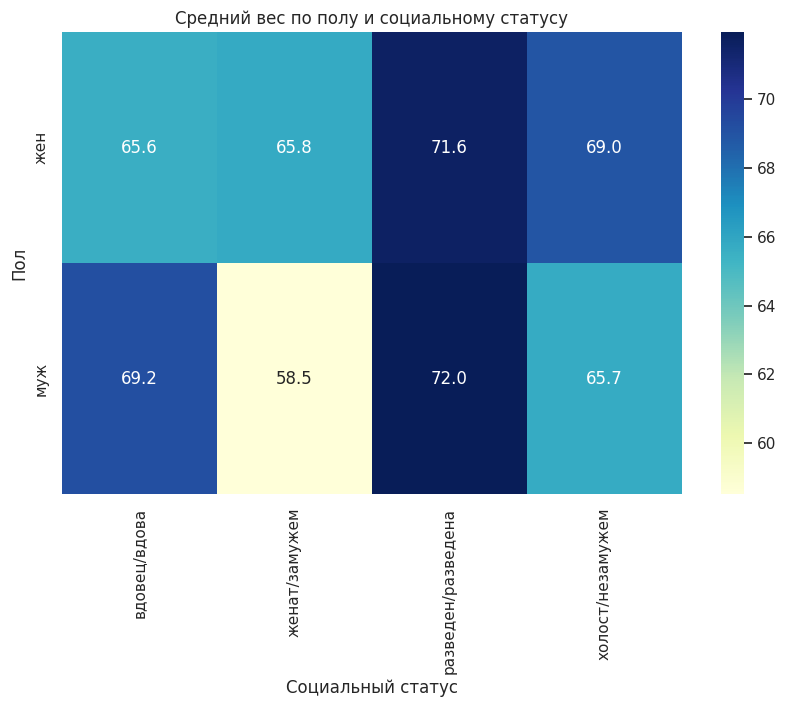

In [44]:
# 7. Тепловая карта среднего веса по полу и социальному статусу
pivot_table = df.pivot_table(values='вес', index='пол', columns='социальный статус', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Средний вес по полу и социальному статусу')
plt.xlabel('Социальный статус')
plt.ylabel('Пол')
plt.show()

<ipython-input-45-ba950d4a7a18>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='пол', y='рост', data=df, palette='Pastel1')
<ipython-input-45-ba950d4a7a18>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='пол', y='вес', data=df, palette='Pastel2')


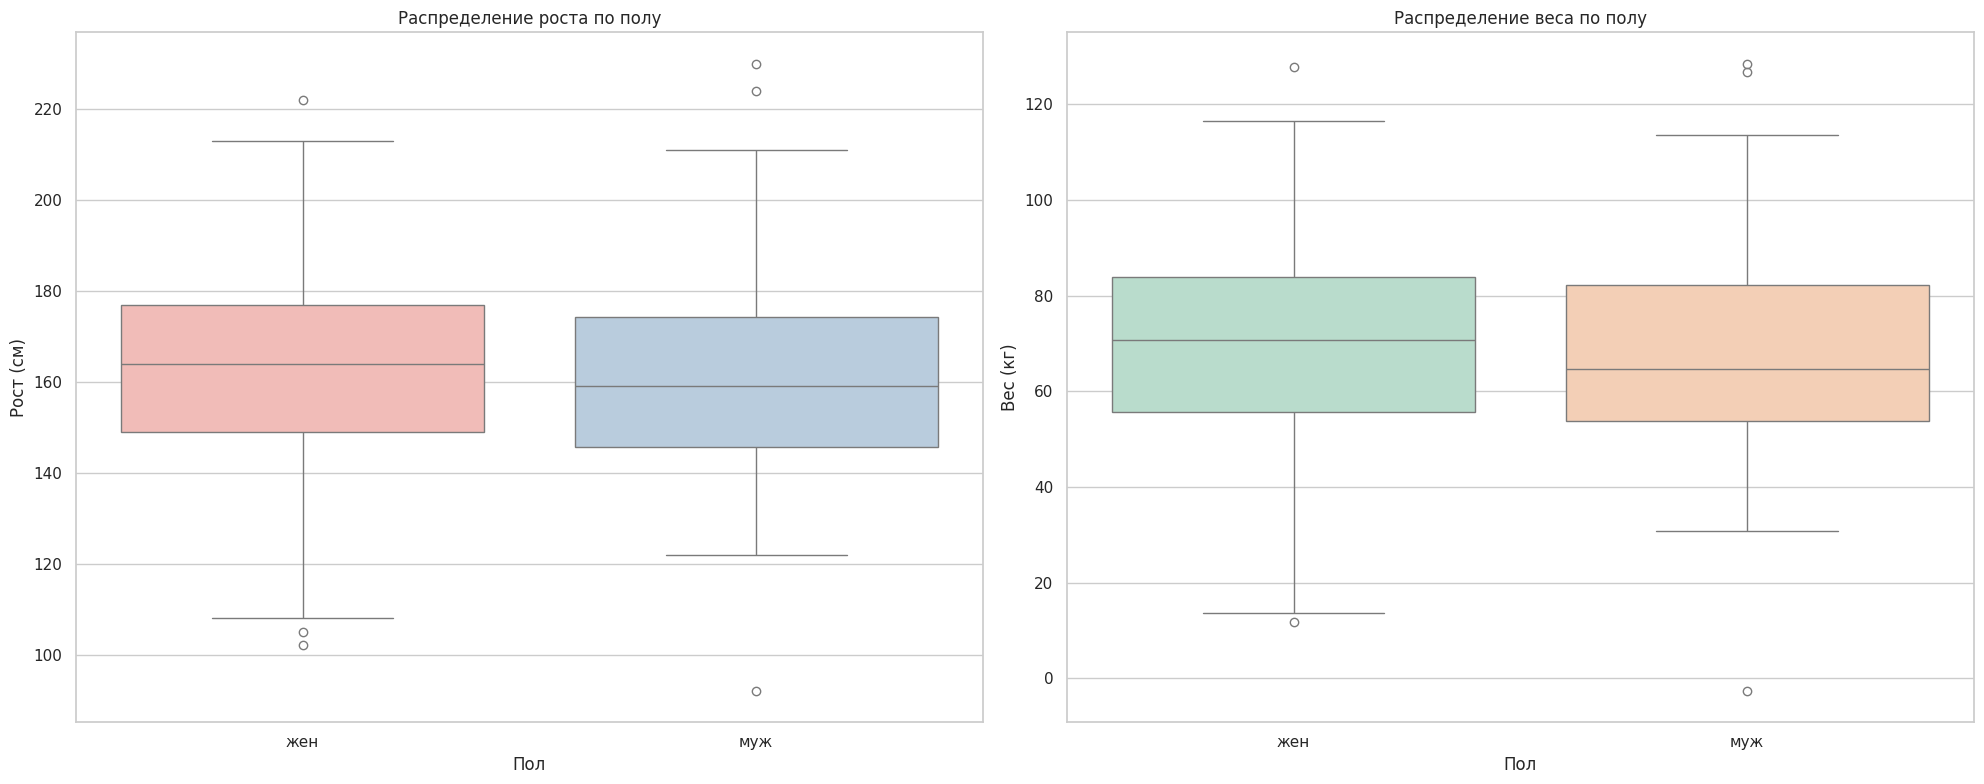

In [45]:
# 8. Матрица диаграмм «ящик с усами» для «рост» и «вес» по полу
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(ax=axes[0], x='пол', y='рост', data=df, palette='Pastel1')
axes[0].set_title('Распределение роста по полу')
axes[0].set_xlabel('Пол')
axes[0].set_ylabel('Рост (см)')

sns.boxplot(ax=axes[1], x='пол', y='вес', data=df, palette='Pastel2')
axes[1].set_title('Распределение веса по полу')
axes[1].set_xlabel('Пол')
axes[1].set_ylabel('Вес (кг)')

plt.tight_layout()
plt.show()

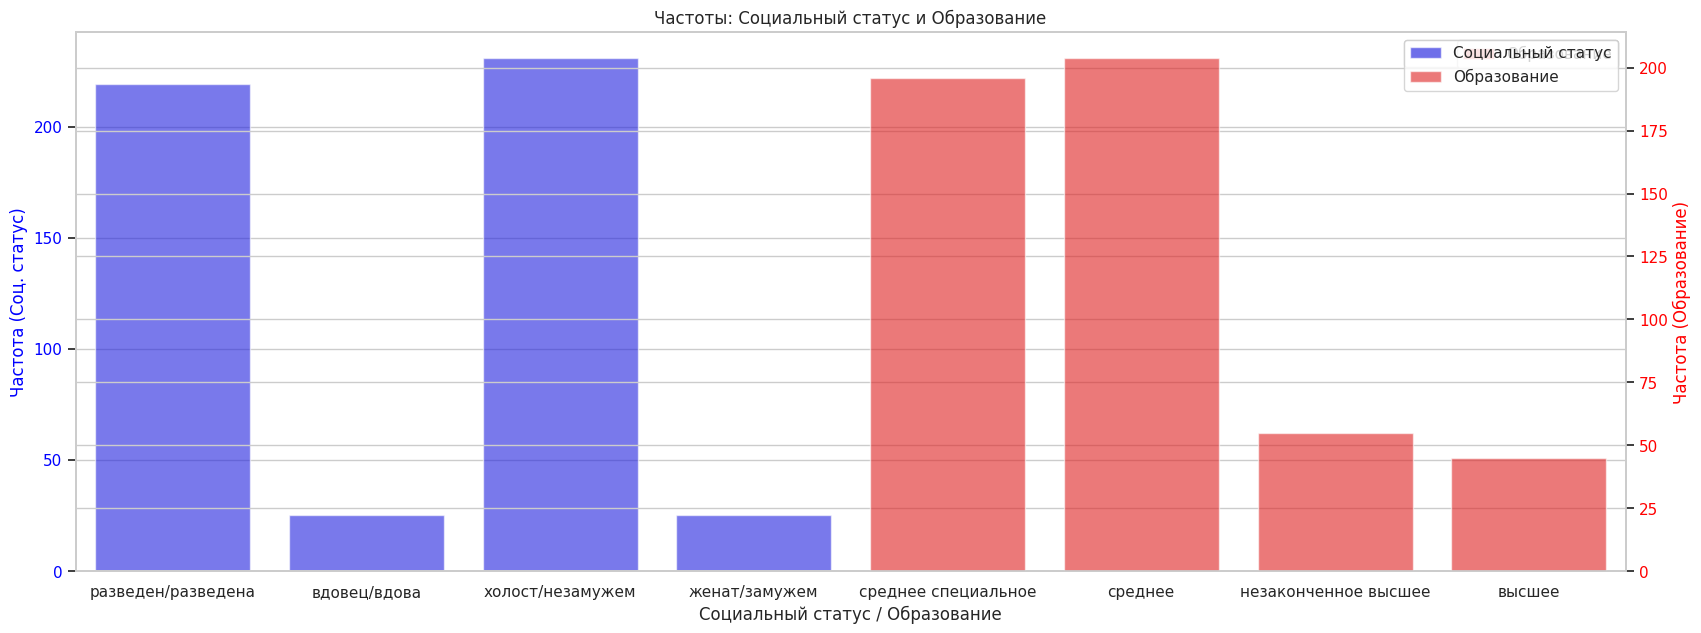

In [46]:
# 9. График с двумя осями для эмпирической плотности частоты
fig, ax1 = plt.subplots(figsize=(20, 7))
sns.countplot(data=df, x='социальный статус', ax=ax1, color='blue', alpha=0.6, label='Социальный статус')
ax1.set_xlabel('Социальный статус / Образование')
ax1.set_ylabel('Частота (Соц. статус)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
sns.countplot(data=df, x='образование', ax=ax2, color='red', alpha=0.6, label='Образование')
ax2.set_ylabel('Частота (Образование)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Частоты: Социальный статус и Образование')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

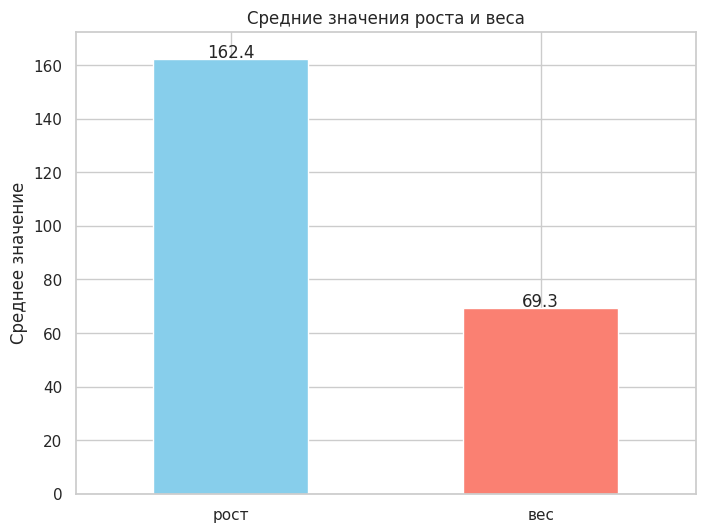

In [47]:
# 10. Построчная диаграмма для средних значений роста и веса
mean_values = df[['рост', 'вес']].mean()
plt.figure(figsize=(8, 6))
mean_values.plot(kind='bar', color=['skyblue', 'salmon'])
plt.ylabel('Среднее значение')
plt.title('Средние значения роста и веса')
plt.xticks(rotation=0)
plt.ylim(0, max(mean_values) + 10)
for index, value in enumerate(mean_values):
    plt.text(index, value + 0.5, f"{value:.1f}", ha='center')
plt.show()